# Week 2 coding tasks
## J.Merritt 2022_09_14

**1. First, import the primary care physicians dataset (`primary_care_physicians.csv`) into a data frame named `physicians`.**

In [1]:
import pandas as pd

In [2]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')

In [3]:
physicians.head()

,FIPS,state,county,primary_care_physicians
0,1001,Alabama,Autauga,26.0
1,1003,Alabama,Baldwin,153.0
2,1005,Alabama,Barbour,8.0
3,1007,Alabama,Bibb,12.0
4,1009,Alabama,Blount,12.0


**2. Filter `physicians` down to just the counties in Tennessee. Save the filtered dataframe back to `physicians`. Verify that the resulting dataframe has 95 rows.**

In [4]:
physicians = physicians.loc[physicians['state'] == 'Tennessee']

In [5]:
physicians.info

<bound method DataFrame.info of        FIPS      state      county  primary_care_physicians
2432  47001  Tennessee    Anderson                     39.0
2433  47003  Tennessee     Bedford                     15.0
2434  47005  Tennessee      Benton                      3.0
2435  47007  Tennessee     Bledsoe                      1.0
2436  47009  Tennessee      Blount                     90.0
...     ...        ...         ...                      ...
2522  47181  Tennessee       Wayne                      5.0
2523  47183  Tennessee     Weakley                     18.0
2524  47185  Tennessee       White                      9.0
2525  47187  Tennessee  Williamson                    338.0
2526  47189  Tennessee      Wilson                     43.0

[95 rows x 4 columns]>

**3. Look at the distribution of the number of primary care physicians. What do you notice?**
##### There is a massive variation in the number of pcp's between counties

In [7]:
physicians['primary_care_physicians'].describe()

count     95.000000
mean      51.042105
std      129.311426
min        0.000000
25%        4.500000
50%       12.000000
75%       26.500000
max      806.000000
Name: primary_care_physicians, dtype: float64

<AxesSubplot:ylabel='Frequency'>

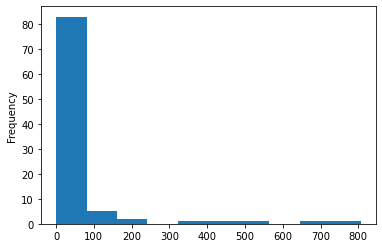

In [8]:
physicians['primary_care_physicians'].plot(kind = 'hist')

**4. Now, import the population by county dataset (`population_by_county.csv`) into a DataFrame named `population`.**

In [9]:
physicians.sort_values('primary_care_physicians').tail(10)

,FIPS,state,county,primary_care_physicians
2514,47165,Tennessee,Sumner,91.0
2488,47113,Tennessee,Madison,129.0
2506,47149,Tennessee,Rutherford,137.0
2513,47163,Tennessee,Sullivan,199.0
2521,47179,Tennessee,Washington,226.0
2525,47187,Tennessee,Williamson,338.0
2464,47065,Tennessee,Hamilton,403.0
2478,47093,Tennessee,Knox,520.0
2450,47037,Tennessee,Davidson,665.0
2510,47157,Tennessee,Shelby,806.0


In [12]:
population = pd.read_csv('../data/population_by_county.csv')

In [13]:
population.head()

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural
2,17165,23994,Saline County,ILLINOIS,Rural
3,17097,701473,Lake County,ILLINOIS,Urban
4,17127,14219,Massac County,ILLINOIS,Rural


**5. Merge the `physicians` DataFrame with the `population` DataFrame. Keep only the values for Tennessee. When you merge, be sure the include both the `population` and `urban` columns in the merged results. Save the result of the merge back to `physicians`.**

In [14]:
physicians = pd.merge(left = physicians, 
                      right = population[['FIPS', 'population', 'urban']], 
                      on = 'FIPS')

In [213]:
# alternative:
# population['county'] = population['county'].str.replace(' County', '')
# physicians = pd.merge(left = physicians, 
#                 right = population.loc[population['state'] 
#                                        == 'TENNESSEE'][['population', 'urban', 'county']], 
#                 on = 'county'
#                 )

**6. How many Tennessee counties are considered urban?**
##### 38

In [15]:
len(physicians.loc[physicians['urban'] == 'Urban'])

38

In [16]:
physicians['urban'].value_counts()

Rural    57
Urban    38
Name: urban, dtype: int64

**7. The State Health Access Data Assistance Center (SHADAC) (https://www.shadac.org/) classifies counties into three groups based on the number of residents per primary care physician. First, counties with fewer than 1500 residents per primary care physician are considered to have an "adequate" supply. Counties with at least 1500 residents but fewer than 3500 residents per primary care physician are considered to have a "moderately inadequate" supply, and counties with at least 3500 residents per primary care physician are considered to have a "low inadequate" supply. How many counties in Tennessee are in each group?** 

Create a column ('res_per_pcp') with values calculated from the 'population' divided by 'primary_care_physicians'.
Create a column 'health_access' populated with NA's, replate with 'adequate', 'moderately_inadequate', or 'low_inadequate' based on the conditions above
Create a new data frame ('tn_health_access') that displays the number of counties in each health access descriptor. 

In [17]:
physicians['res_per_pcp'] = physicians['population'] / physicians['primary_care_physicians']
physicians['health_access'] = 'NA'
physicians.loc[physicians['res_per_pcp'] < 1500, 'health_access'] = 'adequate'
physicians.loc[(physicians['res_per_pcp'] >= 1500) & 
               (physicians['res_per_pcp'] < 3500), 'health_access'] = 'moderately_inadequate'
physicians.loc[(physicians['res_per_pcp'] >= 3500) | 
               (physicians['primary_care_physicians'] == 0), 'health_access'] = 'low_inadequate'

In [20]:
physicians['health_access'].value_counts()

moderately_inadequate    50
low_inadequate           31
adequate                 14
Name: health_access, dtype: int64

In [21]:
 tn_health_access = pd.DataFrame()

In [22]:
 tn_health_access['health_access'] = ['adequate', 'moderately_inadequate', 'low_inadequate']
 tn_health_access['counties'] = [len(physicians.loc[physicians['health_access'] == 'adequate']),
                                len(physicians.loc[physicians['health_access'] == 'moderately_inadequate']),
                                len(physicians.loc[physicians['health_access'] == 'low_inadequate'])
                               ]

In [23]:
tn_health_access

,health_access,counties
0,adequate,14
1,moderately_inadequate,50
2,low_inadequate,31


**8. Does there appear to be any detectable relationship between whether a county is urban or rural and its supply of primary care physicians?**
##### Rural counties are ~twice as likely to have low inadequate access to a pcp than an urban county.

Append the 'tn_health_access' data frame with new columns ('rural' and 'urban') with values computed for the number of urban or rural counties meeting each health access condition.


In [24]:
tn_health_access['urban'] = [len(physicians.loc[(physicians['health_access'] == 'adequate') &
                                                (physicians['urban'] == 'Urban')]),
                             len(physicians.loc[(physicians['health_access'] == 'moderately_inadequate') &
                                                (physicians['urban'] == 'Urban')]),
                             len(physicians.loc[(physicians['health_access'] == 'low_inadequate') &
                                                (physicians['urban'] == 'Urban')])
                               ]

In [25]:
tn_health_access['rural'] = [len(physicians.loc[(physicians['health_access'] == 'adequate') &
                                                ~(physicians['urban'] == 'Urban')]),
                             len(physicians.loc[(physicians['health_access'] == 'moderately_inadequate') &
                                                ~(physicians['urban'] == 'Urban')]),
                             len(physicians.loc[(physicians['health_access'] == 'low_inadequate') &
                                                ~(physicians['urban'] == 'Urban')])
                               ]

Compute normalized frequency of rural and urban counties within each health access grouping

In [31]:
tn_health_access['urban_percentage'] = tn_health_access['urban'] / tn_health_access['counties']

In [32]:
tn_health_access

,health_access,counties,urban,rural,rural_to_urban,urban_percentage
0,adequate,14,9,5,0.555556,0.642857
1,moderately_inadequate,50,19,31,1.631579,0.380000
2,low_inadequate,31,10,21,2.100000,0.322581


In [30]:
#alternative
physicians.loc[(physicians['health_access'] == 'adequate') &
                                                ~(physicians['urban'] == 'Urban')]['urban'].count()

5

In [33]:
#alternative_2
tn_health_access['urban'].value_counts(normalize = True)

9     0.333333
19    0.333333
10    0.333333
Name: urban, dtype: float64